# * Data Cleaning *

In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
os.getcwd() 
os.chdir('/Users/seanoreilly/Desktop/UIC/Fall21/IDS 560/Kavi')
os.getcwd() 

'/Users/seanoreilly/Desktop/UIC/Fall21/IDS 560/Kavi'

In [3]:
df = pd.read_csv("Freight Data.csv")
df.head()

Time Index  Week Of  Total Carloads   Chemicals      Coal   \
0         1.0  3/21/18         263,352      33,430    85,939    
1         2.0  3/28/18         265,756      33,788    87,348    
2         3.0   4/4/18         265,470      33,691    82,740    
3         4.0  4/11/18         261,898      33,694    81,476    
4         5.0  4/18/18          258,123     31,946    75,778    

   Farm Products excl. Grain, and Food   Forest Products     Grain   \
0                               16,050            10,049    23,682    
1                               16,873            10,092    23,570    
2                               15,927            10,595    24,002    
3                               16,382             9,870    25,419    
4                               16,830             9,890    22,559    

   Metallic Ores and Metals   Motor Vehicles and Parts   ...  \
0                    22,421                     17,115   ...   
1                    22,328                     16,675   ...   
2                    24,485                     17,833   ...   
3                    23,401                     17,103   ...   
4                    24,785                     18,838   ...   

   Petroleum and Petroleum Products     Other   Total Intermodal Units   \
0                            10,006     9,420                  273,986    
1                             9,889     9,417                  260,765    
2                             9,906     9,385                  269,281    
3                             9,899     9,087                  263,007    
4                             9,658    10,005                  276,075    

   Total Traffic  Total Traffic / Total Intermodal Units  \
0        537,338                                  50.99%   
1        526,521                                  49.53%   
2        534,751                                  50.36%   
3        524,905                                  50.11%   
4        534,198                                  51.68%   

  Total Carloads / Total Intermodal Units  \
0                                  96.12%   
1                                 101.91%   
2                                  98.58%   
3                                  99.58%   
4                                  93.50%   

  * Pie chart showing the proportion of each commodoty\n* Total Carload = Sum Commodies\n* Total Traffic / Total Intermodal Units ~ 50%\n* Total Carloads / Total Intermodal Units ~ 95%  \
0                                                NaN                                                                                                                                       
1                                                NaN                                                                                                                                       
2                                                NaN                                                                                                                                       
3                                                NaN                                                                                                                                       
4                                                NaN                                                                                                                                       

   Unnamed: 18  Unnamed: 19  Unnamed: 20  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 21 columns]

In [4]:
df = pd.read_csv("Freight Data.csv")
df.head()

Time Index  Week Of  Total Carloads   Chemicals      Coal   \
0         1.0  3/21/18         263,352      33,430    85,939    
1         2.0  3/28/18         265,756      33,788    87,348    
2         3.0   4/4/18         265,470      33,691    82,740    
3         4.0  4/11/18         261,898      33,694    81,476    
4         5.0  4/18/18          258,123     31,946    75,778    

   Farm Products excl. Grain, and Food   Forest Products     Grain   \
0                               16,050            10,049    23,682    
1                               16,873            10,092    23,570    
2                               15,927            10,595    24,002    
3                               16,382             9,870    25,419    
4                               16,830             9,890    22,559    

   Metallic Ores and Metals   Motor Vehicles and Parts   ...  \
0                    22,421                     17,115   ...   
1                    22,328                     16,675   ...   
2                    24,485                     17,833   ...   
3                    23,401                     17,103   ...   
4                    24,785                     18,838   ...   

   Petroleum and Petroleum Products     Other   Total Intermodal Units   \
0                            10,006     9,420                  273,986    
1                             9,889     9,417                  260,765    
2                             9,906     9,385                  269,281    
3                             9,899     9,087                  263,007    
4                             9,658    10,005                  276,075    

   Total Traffic  Total Traffic / Total Intermodal Units  \
0        537,338                                  50.99%   
1        526,521                                  49.53%   
2        534,751                                  50.36%   
3        524,905                                  50.11%   
4        534,198                                  51.68%   

  Total Carloads / Total Intermodal Units  \
0                                  96.12%   
1                                 101.91%   
2                                  98.58%   
3                                  99.58%   
4                                  93.50%   

  * Pie chart showing the proportion of each commodoty\n* Total Carload = Sum Commodies\n* Total Traffic / Total Intermodal Units ~ 50%\n* Total Carloads / Total Intermodal Units ~ 95%  \
0                                                NaN                                                                                                                                       
1                                                NaN                                                                                                                                       
2                                                NaN                                                                                                                                       
3                                                NaN                                                                                                                                       
4                                                NaN                                                                                                                                       

   Unnamed: 18  Unnamed: 19  Unnamed: 20  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 21 columns]

In [5]:
df.drop("* Pie chart showing the proportion of each commodoty\n* Total Carload = Sum Commodies\n* Total Traffic / Total Intermodal Units ~ 50%\n* Total Carloads / Total Intermodal Units ~ 95%", axis = 1, inplace = True)
df.drop(["Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], axis = 1, inplace = True)
df.drop(["Total Traffic / Total Intermodal Units", "Total Carloads / Total Intermodal Units"], axis = 1, inplace = True)
df

Time Index  Week Of  Total Carloads   Chemicals      Coal   \
0           1.0  3/21/18         263,352      33,430    85,939    
1           2.0  3/28/18         265,756      33,788    87,348    
2           3.0   4/4/18         265,470      33,691    82,740    
3           4.0  4/11/18         261,898      33,694    81,476    
4           5.0  4/18/18          258,123     31,946    75,778    
..          ...      ...              ...         ...       ...   
994         NaN      NaN              NaN         NaN       NaN   
995         NaN      NaN              NaN         NaN       NaN   
996         NaN      NaN              NaN         NaN       NaN   
997         NaN      NaN              NaN         NaN       NaN   
998         NaN      NaN              NaN         NaN       NaN   

     Farm Products excl. Grain, and Food   Forest Products     Grain   \
0                                 16,050            10,049    23,682    
1                                 16,873            10,092    23,570    
2                                 15,927            10,595    24,002    
3                                 16,382             9,870    25,419    
4                                 16,830             9,890    22,559    
..                                    ...               ...       ...   
994                                   NaN               NaN       NaN   
995                                   NaN               NaN       NaN   
996                                   NaN               NaN       NaN   
997                                   NaN               NaN       NaN   
998                                   NaN               NaN       NaN   

     Metallic Ores and Metals   Motor Vehicles and Parts   \
0                      22,421                     17,115    
1                      22,328                     16,675    
2                      24,485                     17,833    
3                      23,401                     17,103    
4                      24,785                     18,838    
..                         ...                        ...   
994                        NaN                        NaN   
995                        NaN                        NaN   
996                        NaN                        NaN   
997                        NaN                        NaN   
998                        NaN                        NaN   

     Nonmetallic Minerals   Petroleum and Petroleum Products     Other   \
0                  35,240                             10,006     9,420    
1                  35,776                              9,889     9,417    
2                  36,906                              9,906     9,385    
3                  35,567                              9,899     9,087    
4                  37,834                              9,658    10,005    
..                     ...                                ...       ...   
994                    NaN                                NaN       NaN   
995                    NaN                                NaN       NaN   
996                    NaN                                NaN       NaN   
997                    NaN                                NaN       NaN   
998                    NaN                                NaN       NaN   

     Total Intermodal Units   Total Traffic   
0                   273,986         537,338   
1                   260,765         526,521   
2                   269,281         534,751   
3                   263,007         524,905   
4                   276,075         534,198   
..                       ...             ...  
994                      NaN             NaN  
995                      NaN             NaN  
996                      NaN             NaN  
997                      NaN             NaN  
998                      NaN             NaN  

[999 rows x 15 columns]

In [6]:
df.columns
df.columns = df.columns.str.replace(' ', '')

In [7]:
df.dropna(inplace = True)
df

TimeIndex   WeekOf TotalCarloads Chemicals      Coal  \
0          1.0  3/21/18      263,352    33,430    85,939    
1          2.0  3/28/18      265,756    33,788    87,348    
2          3.0   4/4/18      265,470    33,691    82,740    
3          4.0  4/11/18      261,898    33,694    81,476    
4          5.0  4/18/18       258,123   31,946    75,778    
..         ...      ...           ...       ...       ...   
162      163.0  4/28/21      240,075    34,843    64,252    
163      164.0   5/5/21      240,858    32,053    62,970    
164      165.0  5/12/21      236,019    34,873    62,675    
165      166.0  5/19/21      242,806    33,694    68,327    
166      167.0  5/26/21      242,227    33,161    64,641    

    FarmProductsexcl.Grain,andFood ForestProducts     Grain  \
0                          16,050         10,049    23,682    
1                          16,873         10,092    23,570    
2                          15,927         10,595    24,002    
3                          16,382          9,870    25,419    
4                          16,830          9,890    22,559    
..                             ...            ...       ...   
162                        15,615         10,377    25,467    
163                        16,401         10,167    28,097    
164                        15,985         10,396    25,211    
165                        15,261         10,218    25,473    
166                        16,348         10,132    25,396    

    MetallicOresandMetals MotorVehiclesandParts NonmetallicMinerals  \
0                 22,421                17,115              35,240    
1                 22,328                16,675              35,776    
2                 24,485                17,833              36,906    
3                 23,401                17,103              35,567    
4                 24,785                18,838              37,834    
..                    ...                   ...                 ...   
162               24,248                11,302              32,750    
163               24,462                11,344              33,049    
164               23,543                11,327              32,259    
165               23,686                12,466              31,776    
166               23,516                13,763              33,326    

    PetroleumandPetroleumProducts     Other TotalIntermodalUnits TotalTraffic  
0                         10,006     9,420              273,986      537,338   
1                          9,889     9,417              260,765      526,521   
2                          9,906     9,385              269,281      534,751   
3                          9,899     9,087              263,007      524,905   
4                          9,658    10,005              276,075      534,198   
..                            ...       ...                  ...          ...  
162                       11,131    10,090              298,109      538,184   
163                       10,971    11,344              299,809      540,667   
164                       10,123     9,627              287,290      523,309   
165                       11,230    10,675              291,066      533,872   
166                       10,800    11,144              286,547      528,774   

[167 rows x 15 columns]

In [8]:
df['TotalTraffic'] = df['TotalTraffic'].iloc[:].str.replace(',', '').astype(int)
df['TotalCarloads'] = df['TotalCarloads'].iloc[:].str.replace(',', '').astype(int)
df['Chemicals'] = df['Chemicals'].iloc[:].str.replace(',', '').astype(int)
df['Coal'] = df['Coal'].iloc[:].str.replace(',', '').astype(int)
df['FarmProductsexcl.Grain,andFood'] = df['FarmProductsexcl.Grain,andFood'].iloc[:].str.replace(',', '').astype(int)
df['ForestProducts'] = df['ForestProducts'].iloc[:].str.replace(',', '').astype(int)
df['Grain'] = df['Grain'].iloc[:].str.replace(',', '').astype(int)
df['MetallicOresandMetals'] = df['MetallicOresandMetals'].iloc[:].str.replace(',', '').astype(int)
df['MotorVehiclesandParts'] = df['MotorVehiclesandParts'].iloc[:].str.replace(',', '').astype(int)
df['NonmetallicMinerals'] = df['NonmetallicMinerals'].iloc[:].str.replace(',', '').astype(int)
df['PetroleumandPetroleumProducts'] = df['PetroleumandPetroleumProducts'].iloc[:].str.replace(',', '').astype(int)
df['Other'] = df['Other'].iloc[:].str.replace(',', '').astype(int)
df['TotalIntermodalUnits'] = df['TotalIntermodalUnits'].iloc[:].str.replace(',', '').astype(int)


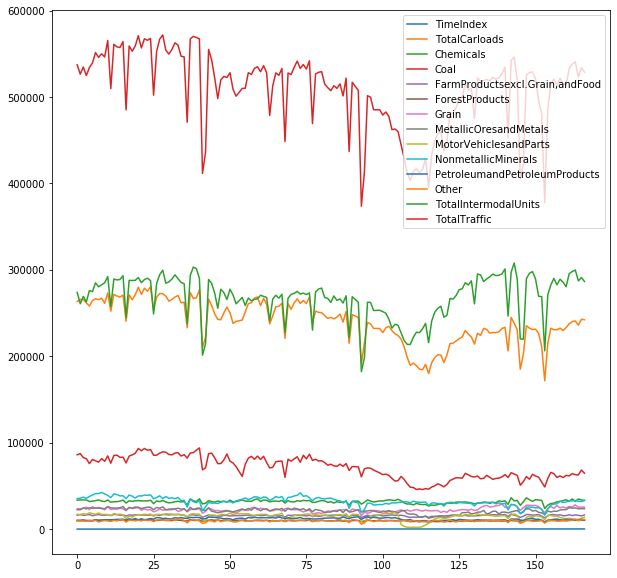

In [9]:
df.plot(figsize=(10,10))

# * First Draft: BASELINE LINEAR REGRESSION *

Single-week predictions; not accurate

0.6576384132696145
MAPE:  15.403699826522251


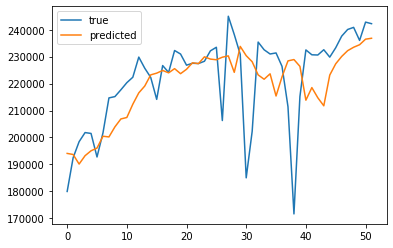

In [10]:
# create rolling window dataset using only Total Carloads ()

n = len(df)
T = 6              # weeks per row
inputs = []
outputs = []
for i in range(n-T-1):            # -1 so size of window when T = 5 you go up until hit 161 bc if go to 162 (which carries thru 167 there's nothing left to predict)
    inputs.append(df['TotalCarloads'].iloc[i:i+T].values)
    outputs.append(df['TotalCarloads'].iloc[i+T+1])

inputs = np.stack(inputs, axis=0)
outputs = np.stack(outputs)


x_train = inputs[:-52]
y_train = outputs[:-52]
x_test = inputs[-52:]
y_test = outputs[-52:]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#LR = LinearRegression()
#LR.fit(x_train,y_train)    # Learned the weights on prior 5 days carloads plus the error term (due to covid - less accurate)
#print(LR.coef_, LR.intercept_)
#y_pred = LR.predict(x_test)
#print("Accuracy: ", LR.score(x_test, y_test))

LR = LinearRegression()
LR.fit(inputs,outputs)
y_pred = LR.predict(x_test)

rsq = LR.score(inputs,outputs)  # Dont segment train/test with anomolous covid year and limited amount of data to begin with so this is better for accuracy
print(rsq)

#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_pred)

#from sklearn.metrics import r2_score
#r2_SCORE = r2_score(y_test, y_pred)
#print(r2_SCORE)
# RMSE gets error in terms of your units (bc units are not squared)
#mse = np.mean((LR.predict(x_test) - y_test) ** 2)
#print("Root MSE in terms of carloads: ", np.sqrt(mse))
y_pred_mape = pd.Series(y_pred)

x_test_mape = x_test
x_test_mape = x_test_mape.flatten()
x_test_mape = pd.Series(x_test_mape)

#type(x_test_mape)
# CALCULATING MAPE
mape = np.mean(np.abs((x_test_mape.values[:52] - y_pred_mape.values) / x_test_mape.values[:52]))*100
print("MAPE: ", mape)


plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Linear regression only predicts one day into the future. Values don't change much day to day so easy to predict next days value.
# MAPE Values are low because predictions are always close to the real values, because we use all prior days freight quantities to predict next days - very easy even for terrible model,
# However, r2 value is low because although the guesses are close to actuals, the guesses aren't in the right direction, or the variation in future total traffic is not well explained by variation in prior commodity loads.
# If we were to predict month into future, MAPE would be huge here.
# ARIMA can predict into the future with higher accuracy by utilizing prior TS lags.

In [11]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
mse = np.mean((LR.predict(x_test) - y_test) ** 2)
print("MSE: ", mse)
print("Root MSE: ", np.sqrt(mse))
LR.score(x_test,y_test)

MSE:  349033125.51375556
Root MSE:  18682.428255281902


-0.23630477497495161

In [12]:
df.dtypes

TimeIndex                         float64
WeekOf                             object
TotalCarloads                       int64
Chemicals                           int64
Coal                                int64
FarmProductsexcl.Grain,andFood      int64
ForestProducts                      int64
Grain                               int64
MetallicOresandMetals               int64
MotorVehiclesandParts               int64
NonmetallicMinerals                 int64
PetroleumandPetroleumProducts       int64
Other                               int64
TotalIntermodalUnits                int64
TotalTraffic                        int64
dtype: object

# ARIMA MODELING

Autoregressive forecast; need to extend to "unseen" data

In [13]:
list(df)

['TimeIndex',
 'WeekOf',
 'TotalCarloads',
 'Chemicals',
 'Coal',
 'FarmProductsexcl.Grain,andFood',
 'ForestProducts',
 'Grain',
 'MetallicOresandMetals',
 'MotorVehiclesandParts',
 'NonmetallicMinerals',
 'PetroleumandPetroleumProducts',
 'Other',
 'TotalIntermodalUnits',
 'TotalTraffic']

In [14]:
df['TotalCarloads']

0      263352
1      265756
2      265470
3      261898
4      258123
        ...  
162    240075
163    240858
164    236019
165    242806
166    242227
Name: TotalCarloads, Length: 167, dtype: int64

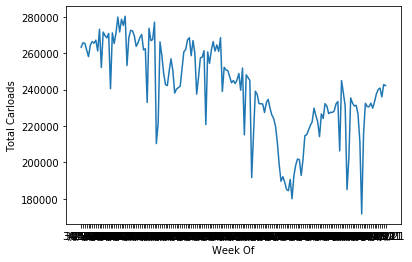

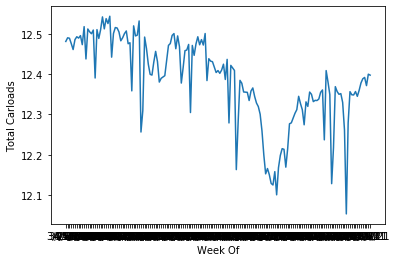

In [15]:
# Compare Original series vs Log
plt.xlabel("Week Of")
plt.ylabel("Total Carloads")
plt.plot(df['WeekOf'],df['TotalCarloads'])
plt.show()

# Log
TC_log=np.log(df["TotalCarloads"])
plt.xlabel("Week Of")
plt.ylabel("Total Carloads")
plt.plot(df['WeekOf'],TC_log)
plt.show()

In [16]:
df['WeekOf'] = df['WeekOf'].astype("string")
df.dtypes

TimeIndex                         float64
WeekOf                             string
TotalCarloads                       int64
Chemicals                           int64
Coal                                int64
FarmProductsexcl.Grain,andFood      int64
ForestProducts                      int64
Grain                               int64
MetallicOresandMetals               int64
MotorVehiclesandParts               int64
NonmetallicMinerals                 int64
PetroleumandPetroleumProducts       int64
Other                               int64
TotalIntermodalUnits                int64
TotalTraffic                        int64
dtype: object

In [17]:
# Testing Stationarity Assumption (that the mean and variance (or std) do not change over time)

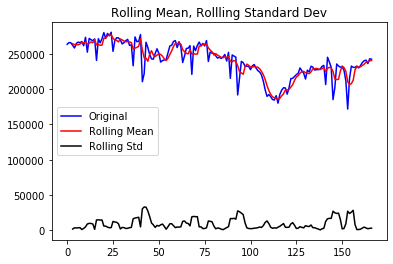

ADF Statistic:  -1.6089335497248607
p-value: 0.47910449888025813


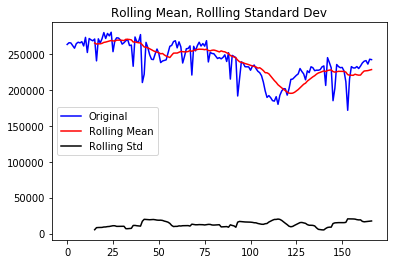

ADF Statistic:  -1.6089335497248607
p-value: 0.47910449888025813


In [18]:
rolling_mean=df["TotalCarloads"].rolling(window = 4).mean()
rolling_std=df["TotalCarloads"].rolling(window = 4).std()

plt.plot(df["TotalCarloads"], color = 'blue', label = "Original")
plt.plot(rolling_mean, color = "red", label = "Rolling Mean")
plt.plot(rolling_std, color = "black", label = "Rolling Std")
plt.legend(loc = 'best')
plt.title("Rolling Mean, Rollling Standard Dev")
plt.show()


# We see that the std of the rolling avg is level, but the mean exhibits slight decrease over time.
# Unclear if stationarity assumption is met
result = adfuller(df["TotalCarloads"])
print('ADF Statistic: ', result[0])
print('p-value: {}'.format(result[1]))


rolling_mean=df["TotalCarloads"].rolling(window = 16).mean()
rolling_std=df["TotalCarloads"].rolling(window = 16).std()

plt.plot(df["TotalCarloads"], color = 'blue', label = "Original")
plt.plot(rolling_mean, color = "red", label = "Rolling Mean")
plt.plot(rolling_std, color = "black", label = "Rolling Std")
plt.legend(loc = 'best')
plt.title("Rolling Mean, Rollling Standard Dev")
plt.show()


# We see that the std of the rolling avg is level, but the mean exhibits slight decrease over time.
# Unclear if stationarity assumption is met
result = adfuller(df["TotalCarloads"])
print('ADF Statistic: ', result[0])
print('p-value: {}'.format(result[1]))


In [19]:
# P value is greater than .05 or .1 threshold, so time series is NOT stationary.
# So this means do ARIMA!

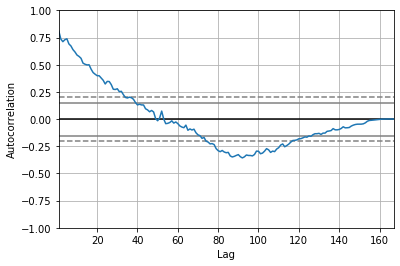

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["TotalCarloads"])

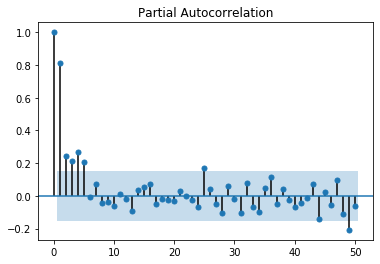

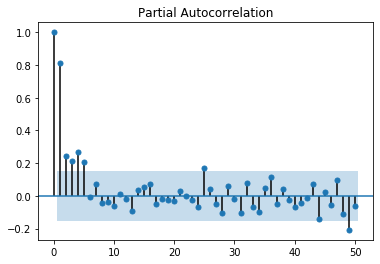

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["TotalCarloads"], lags=50)

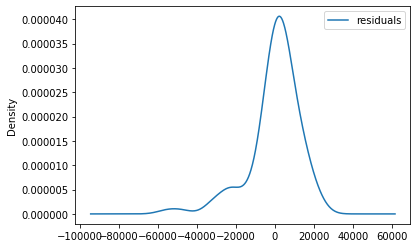

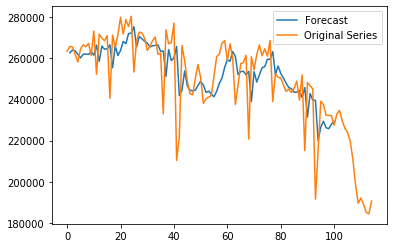

MAPE:  2.561129427807304


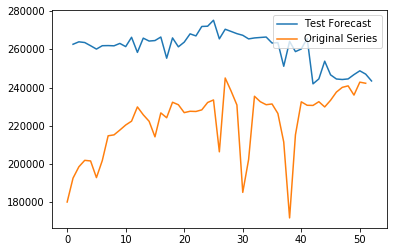

52
52
MAPE:  18.30147224135363


In [22]:
# PACF spikes towards 0 after p significant lags (2) while ACF decays to 0 thus AR signaturs
# ARIMA Parameters: ((p,d,q))

#decomposition = seasonal_decompose(df["TotalCarloads"], period = len(df["TotalCarloads"])//2) 
train_weeks = df["TotalCarloads"].iloc[:-52]
test_weeks = df["TotalCarloads"].iloc[-52:]

from statsmodels.tsa.arima_model import ARIMA

order = (2, 1, 2)
model = ARIMA(train_weeks, order)
fit = model.fit()

fit.summary()

# Residuals plot to see error distribution
residuals = pd.DataFrame(fit.resid, columns=['residuals'])
residuals.plot(kind='kde')
plt.show()

# TRAIN DATA
# Arima Forecast (can only forecast out as long as the training period is)
preds = fit.predict(1, 100, typ='levels')    # "Levels": After predicting differences, converts them back into actual variable values instead of just finding out every week it changed by ____ much
plt.plot(preds)
plt.plot(train_weeks.values)
plt.legend(["Forecast","Original Series"], loc ="upper right")
plt.show()

# preds has 100 values for now, training set has 115
mape = np.mean(np.abs((train_weeks.values[:len(preds)] - preds.values) / train_weeks.values[:len(preds)]))*100
print("MAPE: ", mape)


# ON TEST DATA
preds = fit.predict(1, 52, typ='levels')    # "Levels": After predicting differences, converts them back into actual variable values instead of just finding out every week it changed by ____ much
plt.plot(preds)
plt.plot(test_weeks.values)
plt.legend(["Test Forecast","Original Series"], loc ="upper right")
plt.show()

print(len(preds))
print(len(test_weeks))
# preds has 100 values for now, training set has 115
mape = np.mean(np.abs((test_weeks.values[:len(preds)] - preds.values) / test_weeks.values[:len(preds)]))*100
print("MAPE: ", mape)

In [23]:
# ARIMA model at this point only forecasts on data periods currently available - so we're limited to 3 years.
# Need to figureo out how to extend this
type(train_weeks)

pandas.core.series.Series

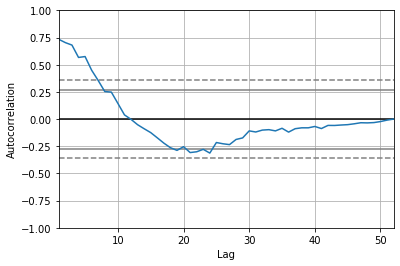

In [24]:
# VERIFYING DIFFERENCING ORDER IS SET CORRECTLY
# If TS lacks a tendency to return to its mean value, or if autocorrelations are positive out to high # of lags (e.g., 10 or more), then it needs a higher order of differencing
autocorrelation_plot(preds)
# Autocorrelations don't decay to 0 quickly, so set we should set Differencing order higher than 1. Rerun above
# Arima function is throwing error when set higher differencing order - must think order 1 is ok. :)

# VAR

In [317]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse,aic
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import matplotlib.pyplot as plt
df

WeekOf  TotalCarloads  Chemicals   Coal  FarmProductsexcl.Grain,andFood  \
0    3/21/18         263352      33430  85939                           16050   
1    3/28/18         265756      33788  87348                           16873   
2     4/4/18         265470      33691  82740                           15927   
3    4/11/18         261898      33694  81476                           16382   
4    4/18/18         258123      31946  75778                           16830   
..       ...            ...        ...    ...                             ...   
162  4/28/21         240075      34843  64252                           15615   
163   5/5/21         240858      32053  62970                           16401   
164  5/12/21         236019      34873  62675                           15985   
165  5/19/21         242806      33694  68327                           15261   
166  5/26/21         242227      33161  64641                           16348   

     ForestProducts  Grain  MetallicOresandMetals  MotorVehiclesandParts  \
0             10049  23682                  22421                  17115   
1             10092  23570                  22328                  16675   
2             10595  24002                  24485                  17833   
3              9870  25419                  23401                  17103   
4              9890  22559                  24785                  18838   
..              ...    ...                    ...                    ...   
162           10377  25467                  24248                  11302   
163           10167  28097                  24462                  11344   
164           10396  25211                  23543                  11327   
165           10218  25473                  23686                  12466   
166           10132  25396                  23516                  13763   

     NonmetallicMinerals  PetroleumandPetroleumProducts  Other  \
0                  35240                          10006   9420   
1                  35776                           9889   9417   
2                  36906                           9906   9385   
3                  35567                           9899   9087   
4                  37834                           9658  10005   
..                   ...                            ...    ...   
162                32750                          11131  10090   
163                33049                          10971  11344   
164                32259                          10123   9627   
165                31776                          11230  10675   
166                33326                          10800  11144   

     TotalIntermodalUnits  TotalTraffic  Gas Price  
0                  273986        537338      2.598  
1                  260765        526521      2.648  
2                  269281        534751      2.700  
3                  263007        524905      2.694  
4                  276075        534198      2.747  
..                    ...           ...        ...  
162                298109        538184      2.872  
163                299809        540667      2.890  
164                287290        523309      2.961  
165                291066        533872      3.028  
166                286547        528774      3.020  

[167 rows x 15 columns]

In [318]:
gas_df = pd.read_csv("Weekly Gas Price Data.csv")
gas_df.columns
print(gas_df)

              Date  \
0     Aug 20, 1990   
1     Aug 27, 1990   
2     Sep 03, 1990   
3     Sep 10, 1990   
4     Sep 17, 1990   
...            ...   
1618  Aug 23, 2021   
1619  Aug 30, 2021   
1620  Sep 06, 2021   
1621  Sep 13, 2021   
1622           NaN   

      Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)  
0                                                 1.191                                  
1                                                 1.245                                  
2                                                 1.242                                  
3                                                 1.252                                  
4                                                 1.266                                  
...                                                 ...                                  
1618                                              3.145                                  
1619           

In [319]:
len(gas_df)
#gas_df["Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)"][159]

1623

In [320]:
gas_df.drop(index=gas_df.index[0:1439], 
        axis=0, 
        inplace=True)

In [321]:
gas_df.drop(gas_df.tail(17).index,
        inplace = True)

In [322]:
gas_df = gas_df.rename(columns={"Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)":"Gas Price"})
gas_df

Date  Gas Price
1439  Mar 19, 2018      2.598
1440  Mar 26, 2018      2.648
1441  Apr 02, 2018      2.700
1442  Apr 09, 2018      2.694
1443  Apr 16, 2018      2.747
...            ...        ...
1601  Apr 26, 2021      2.872
1602  May 03, 2021      2.890
1603  May 10, 2021      2.961
1604  May 17, 2021      3.028
1605  May 24, 2021      3.020

[167 rows x 2 columns]

In [323]:
len(gas_df)

167

In [324]:
gas_df = gas_df.dropna()

In [325]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=1200, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = gas_df[gas_df.columns[i]]
    ax.plot(data, color="red", linewidth=1)
    #Decorations
    ax.set_title(gas_df.columns[i])
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout();

In [326]:
gas_df.drop("Date", axis = 1, inplace = True)

In [327]:
gas_df.dtypes

Gas Price    float64
dtype: object

In [328]:
gas_df.dtypes
print(gas_df)

      Gas Price
1439      2.598
1440      2.648
1441      2.700
1442      2.694
1443      2.747
...         ...
1601      2.872
1602      2.890
1603      2.961
1604      3.028
1605      3.020

[167 rows x 1 columns]


In [329]:
len(df), len(gas_df)

(167, 167)

In [330]:
df["Gas Price"] = gas_df.values

In [331]:
df.drop("TimeIndex", axis = 1, inplace = True)

KeyError: "['TimeIndex'] not found in axis"

In [332]:
df

WeekOf  TotalCarloads  Chemicals   Coal  FarmProductsexcl.Grain,andFood  \
0    3/21/18         263352      33430  85939                           16050   
1    3/28/18         265756      33788  87348                           16873   
2     4/4/18         265470      33691  82740                           15927   
3    4/11/18         261898      33694  81476                           16382   
4    4/18/18         258123      31946  75778                           16830   
..       ...            ...        ...    ...                             ...   
162  4/28/21         240075      34843  64252                           15615   
163   5/5/21         240858      32053  62970                           16401   
164  5/12/21         236019      34873  62675                           15985   
165  5/19/21         242806      33694  68327                           15261   
166  5/26/21         242227      33161  64641                           16348   

     ForestProducts  Grain  MetallicOresandMetals  MotorVehiclesandParts  \
0             10049  23682                  22421                  17115   
1             10092  23570                  22328                  16675   
2             10595  24002                  24485                  17833   
3              9870  25419                  23401                  17103   
4              9890  22559                  24785                  18838   
..              ...    ...                    ...                    ...   
162           10377  25467                  24248                  11302   
163           10167  28097                  24462                  11344   
164           10396  25211                  23543                  11327   
165           10218  25473                  23686                  12466   
166           10132  25396                  23516                  13763   

     NonmetallicMinerals  PetroleumandPetroleumProducts  Other  \
0                  35240                          10006   9420   
1                  35776                           9889   9417   
2                  36906                           9906   9385   
3                  35567                           9899   9087   
4                  37834                           9658  10005   
..                   ...                            ...    ...   
162                32750                          11131  10090   
163                33049                          10971  11344   
164                32259                          10123   9627   
165                31776                          11230  10675   
166                33326                          10800  11144   

     TotalIntermodalUnits  TotalTraffic  Gas Price  
0                  273986        537338      2.598  
1                  260765        526521      2.648  
2                  269281        534751      2.700  
3                  263007        524905      2.694  
4                  276075        534198      2.747  
..                    ...           ...        ...  
162                298109        538184      2.872  
163                299809        540667      2.890  
164                287290        523309      2.961  
165                291066        533872      3.028  
166                286547        528774      3.020  

[167 rows x 15 columns]

In [333]:
dateless_df = df.drop(columns=["WeekOf"])

In [334]:
dateless_df

TotalCarloads  Chemicals   Coal  FarmProductsexcl.Grain,andFood  \
0           263352      33430  85939                           16050   
1           265756      33788  87348                           16873   
2           265470      33691  82740                           15927   
3           261898      33694  81476                           16382   
4           258123      31946  75778                           16830   
..             ...        ...    ...                             ...   
162         240075      34843  64252                           15615   
163         240858      32053  62970                           16401   
164         236019      34873  62675                           15985   
165         242806      33694  68327                           15261   
166         242227      33161  64641                           16348   

     ForestProducts  Grain  MetallicOresandMetals  MotorVehiclesandParts  \
0             10049  23682                  22421                  17115   
1             10092  23570                  22328                  16675   
2             10595  24002                  24485                  17833   
3              9870  25419                  23401                  17103   
4              9890  22559                  24785                  18838   
..              ...    ...                    ...                    ...   
162           10377  25467                  24248                  11302   
163           10167  28097                  24462                  11344   
164           10396  25211                  23543                  11327   
165           10218  25473                  23686                  12466   
166           10132  25396                  23516                  13763   

     NonmetallicMinerals  PetroleumandPetroleumProducts  Other  \
0                  35240                          10006   9420   
1                  35776                           9889   9417   
2                  36906                           9906   9385   
3                  35567                           9899   9087   
4                  37834                           9658  10005   
..                   ...                            ...    ...   
162                32750                          11131  10090   
163                33049                          10971  11344   
164                32259                          10123   9627   
165                31776                          11230  10675   
166                33326                          10800  11144   

     TotalIntermodalUnits  TotalTraffic  Gas Price  
0                  273986        537338      2.598  
1                  260765        526521      2.648  
2                  269281        534751      2.700  
3                  263007        524905      2.694  
4                  276075        534198      2.747  
..                    ...           ...        ...  
162                298109        538184      2.872  
163                299809        540667      2.890  
164                287290        523309      2.961  
165                291066        533872      3.028  
166                286547        528774      3.020  

[167 rows x 14 columns]

In [335]:
df["WeekOf"]

0      3/21/18
1      3/28/18
2       4/4/18
3      4/11/18
4      4/18/18
        ...   
162    4/28/21
163     5/5/21
164    5/12/21
165    5/19/21
166    5/26/21
Name: WeekOf, Length: 167, dtype: string

In [336]:
# Testing idea that the time serieses influence each other.
# We see relatively strong evidence that the serieses influence each other (feature p values are < sig threshold)
# all 4 train can change to dateless
maxlag = 4
test = 'ssr_chi2test'
var_list = ["TotalCarloads","Chemicals","Coal","FarmProductsexcl.Grain,andFood","ForestProducts","Grain","MetallicOresandMetals","MotorVehiclesandParts","NonmetallicMinerals","PetroleumandPetroleumProducts","Other","TotalIntermodalUnits","TotalTraffic","Gas Price"]
def grangers_causation_matrix(train_weeks, var_list , test = 'ssr_chi2test', verbose = False):
    df1 = pd.DataFrame(np.zeros((len(var_list), len(var_list))), columns=var_list, index=var_list)
    for c in df1.columns:
        for r in df1.index:
            test_result = grangercausalitytests(train_weeks[[r,c]], maxlag=maxlag, verbose=False)
            p_values =  [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            df1.loc[r,c] = min_p_value
    df1.columns = [var + "_x" for var in var_list]
    df1.index = [var + "_y" for var in var_list]
    return df1
grangers_causation_matrix(train_weeks, var_list = train_weeks.columns)

TotalCarloads_x  Chemicals_x  Coal_x  \
TotalCarloads_y                            1.0000       0.0000  0.0035   
Chemicals_y                                0.0288       1.0000  0.0393   
Coal_y                                     0.2495       0.0054  1.0000   
FarmProductsexcl.Grain,andFood_y           0.0177       0.2151  0.0058   
ForestProducts_y                           0.0002       0.2697  0.0000   
Grain_y                                    0.6631       0.0402  0.3055   
MetallicOresandMetals_y                    0.0172       0.0790  0.0024   
MotorVehiclesandParts_y                    0.0302       0.0005  0.0106   
NonmetallicMinerals_y                      0.1120       0.0007  0.6284   
PetroleumandPetroleumProducts_y            0.0842       0.0004  0.0844   
Other_y                                    0.2708       0.1479  0.2006   
TotalIntermodalUnits_y                     0.0061       0.0006  0.0002   
TotalTraffic_y                             0.0030       0.0001  0.0001   
Gas Price_y                                0.5331       0.3043  0.4444   

                                  FarmProductsexcl.Grain,andFood_x  \
TotalCarloads_y                                             0.0310   
Chemicals_y                                                 0.6570   
Coal_y                                                      0.1087   
FarmProductsexcl.Grain,andFood_y                            1.0000   
ForestProducts_y                                            0.5222   
Grain_y                                                     0.8026   
MetallicOresandMetals_y                                     0.4505   
MotorVehiclesandParts_y                                     0.4572   
NonmetallicMinerals_y                                       0.0252   
PetroleumandPetroleumProducts_y                             0.0766   
Other_y                                                     0.0626   
TotalIntermodalUnits_y                                      0.1319   
TotalTraffic_y                                              0.0984   
Gas Price_y                                                 0.0137   

                                  ForestProducts_x  Grain_x  \
TotalCarloads_y                             0.0301   0.3489   
Chemicals_y                                 0.3206   0.4038   
Coal_y                                      0.0280   0.5814   
FarmProductsexcl.Grain,andFood_y            0.3468   0.8631   
ForestProducts_y                            1.0000   0.1372   
Grain_y                                     0.6967   1.0000   
MetallicOresandMetals_y                     0.1010   0.4575   
MotorVehiclesandParts_y                     0.3475   0.4367   
NonmetallicMinerals_y                       0.0750   0.7160   
PetroleumandPetroleumProducts_y             0.0214   0.0125   
Other_y                                     0.5346   0.9004   
TotalIntermodalUnits_y                      0.0518   0.8334   
TotalTraffic_y                              0.1404   0.6588   
Gas Price_y                                 0.3506   0.1263   

                                  MetallicOresandMetals_x  \
TotalCarloads_y                                    0.0091   
Chemicals_y                                        0.0848   
Coal_y                                             0.0067   
FarmProductsexcl.Grain,andFood_y                   0.0148   
ForestProducts_y                                   0.0003   
Grain_y                                            0.1870   
MetallicOresandMetals_y                            1.0000   
MotorVehiclesandParts_y                            0.0175   
NonmetallicMinerals_y                              0.0440   
PetroleumandPetroleumProducts_y                    0.0900   
Other_y                                            0.1405   
TotalIntermodalUnits_y                             0.0000   
TotalTraffic_y                                     0.0001   
Gas Price_y                                        0.2251   

          

In [337]:
# Testing stationarity assumption of new Gas Price time series

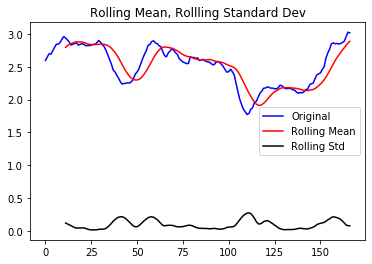

ADF Statistic:  -2.2610160276335947
p-value: 0.18484938235831688


In [338]:
rolling_mean=df["Gas Price"].rolling(window =12).mean()
rolling_std=df["Gas Price"].rolling(window = 12).std()

plt.plot(df["Gas Price"], color = 'blue', label = "Original")
plt.plot(rolling_mean, color = "red", label = "Rolling Mean")
plt.plot(rolling_std, color = "black", label = "Rolling Std")
plt.legend(loc = 'best')
plt.title("Rolling Mean, Rollling Standard Dev")
plt.show()

# We see that the std of the rolling avg is level, but the mean exhibits slight decrease over time.
# Unclear if stationarity assumption is met
result = adfuller(df["Gas Price"])
print('ADF Statistic: ', result[0])
print('p-value: {}'.format(result[1]))

In [339]:
# P value is greater than .05 or .1 threshold, so time series is NOT stationary.
# So this means do differencing!

In [340]:
train_weeks = df.iloc[:-52]
test_weeks = df.iloc[-52:]

print(train_weeks.shape)
print(test_weeks.shape)

print(dateless_df.shape)

(115, 15)
(52, 15)
(167, 14)


In [341]:
train_weeks = train_weeks.drop("WeekOf", axis =1 )
test_weeks = test_weeks.drop("WeekOf", axis=1)

In [342]:
# Perform ADF test to determine stationarity       AIC is method of scoring a model
# both train can change to dateless
def adfuller_test(train_weeks, signif=.05, name="", verbose=False):
    r = adfuller(train_weeks, autolag="AIC")
    output = {'test_statistic':round(r[0],4), "pvalue":round(r[1],4), "n_lags":round(r[2],4), "n_obs":r[3]}
    p_value = output["pvalue"]
    def adjust(val, length=6): return str(val).ljust(length)
    
    # Print Report
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n ", '-'*40)
    print(f' Null Hypothesis: Non-Stationary')
    print(f' Significance Level = {signif}')
    print(f' Test Statistic = {output["test_statistic"]}')
    print(f' No. Lags Chosen = {output["n_lags"]}')
    
    if p_value <= signif:
        print(f' => P-Value = {p_value}. Rejecting Null Hypothesis.')
        print(f' => Series is Stationary.')
              
    else:
        print(f' => P-Value = {p_value}. Weak evidence to reject Null.')
        print(f' => Series is Non-Stationary')
              

In [343]:
# ADF test on each feature
# train_Weeks can be changed to dateless 
for name, column in train_weeks.iteritems():         # Need iteritems to iterate over tuple or to grab the column name and the contents (2 things instead of "for i in dateless_df" which grabs 1 thing)
    adfuller_test(column, name=column.name)          # or just to grab "name" which is official input to adfuller test, and the column whose name is input into "name" parameter
    print('\n')
    
                                                      # adfuller test takes name as an input, which is the same as the col

 Augmented Dickey-Fuller Test on "TotalCarloads" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 Test Statistic = 0.7825
 No. Lags Chosen = 4
 => P-Value = 0.9913. Weak evidence to reject Null.
 => Series is Non-Stationary


 Augmented Dickey-Fuller Test on "Chemicals" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 Test Statistic = -3.2819
 No. Lags Chosen = 2
 => P-Value = 0.0157. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Coal" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 Test Statistic = 0.7867
 No. Lags Chosen = 4
 => P-Value = 0.9914. Weak evidence to reject Null.
 => Series is Non-Stationary


 Augmented Dickey-Fuller Test on "FarmProductsexcl.Grain,andFood" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 T

In [344]:
# We observe some of the series are not stationary --> We need to difference them all once
# 1st Difference
# train can be changed to dateless here
df_differenced = train_weeks.diff().dropna()

In [345]:
# Now rerun ADF on differenced data

for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    
    

 Augmented Dickey-Fuller Test on "TotalCarloads" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 Test Statistic = -9.4801
 No. Lags Chosen = 3
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Chemicals" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 Test Statistic = -8.8735
 No. Lags Chosen = 3
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Coal" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 Test Statistic = -8.5687
 No. Lags Chosen = 3
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "FarmProductsexcl.Grain,andFood" 
  ----------------------------------------
 Null Hypothesis: Non-Stationary
 Significance Level = 0.05
 Test Statistic = -8.

In [346]:
df_differenced

TotalCarloads  Chemicals    Coal  FarmProductsexcl.Grain,andFood  \
1           2404.0      358.0  1409.0                           823.0   
2           -286.0      -97.0 -4608.0                          -946.0   
3          -3572.0        3.0 -1264.0                           455.0   
4          -3775.0    -1748.0 -5698.0                           448.0   
5           6429.0      362.0  4830.0                         -1288.0   
..             ...        ...     ...                             ...   
110         2512.0    -1028.0  -295.0                           407.0   
111        -2920.0     1671.0 -2322.0                          -232.0   
112        -4046.0     -977.0   709.0                           382.0   
113         -729.0     -385.0  -759.0                           -58.0   
114         6224.0      154.0  1107.0                          1042.0   

     ForestProducts   Grain  MetallicOresandMetals  MotorVehiclesandParts  \
1              43.0  -112.0                  -93.0                 -440.0   
2             503.0   432.0                 2157.0                 1158.0   
3            -725.0  1417.0                -1084.0                 -730.0   
4              20.0 -2860.0                 1384.0                 1735.0   
5              98.0  3379.0                 -813.0                 -736.0   
..              ...     ...                    ...                    ...   
110            84.0  1001.0                  232.0                  292.0   
111           183.0   962.0                 -961.0                 -250.0   
112          -483.0 -1026.0                -2911.0                  123.0   
113           468.0  -837.0                  477.0                  757.0   
114          -258.0  1187.0                  704.0                 2009.0   

     NonmetallicMinerals  PetroleumandPetroleumProducts   Other  \
1                  536.0                         -117.0    -3.0   
2                 1130.0                           17.0   -32.0   
3                -1339.0                           -7.0  -298.0   
4                 2267.0                         -241.0   918.0   
5                 1553.0                         -302.0  -654.0   
..                   ...                            ...     ...   
110               1934.0                        -1436.0  1321.0   
111               -989.0                           34.0 -1016.0   
112               -279.0                           10.0   406.0   
113                 49.0                          233.0  -674.0   
114                257.0                           50.0   -28.0   

     TotalIntermodalUnits  TotalTraffic  Gas Price  
1                -13221.0      -10817.0      0.050  
2                  8516.0        8230.0      0.052  
3                 -6274.0       -9846.0     -0.006  
4                 13068.0        9293.0      0.053  
5                 -1202.0        5227.0      0.051  
..                    ...           ...        ...  
110                8328.0       10840.0     -0.039  
111                5751.0        2831.0      0.016  
112                -359.0       -4405.0      0.062  
113                4295.0        3566.0      0.027  
114                6376.0       12600.0      0.082  

[114 rows x 14 columns]

## All series are now stationary

In [351]:
# Fit var models of differing orders to see which yoelds lowest AIC
model = VAR(df_differenced)
x=model.select_order(maxlags = 6)
x.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.table.SimpleTable'>

## For Training: AIC is lowest at lag 6 before it begins to go up then down again.
## SELECTED ORDER OF 6

## For Testing: AIC is lowest at lag 9 before it rapidly declines and results in terrible accuracy.
## SELECTED ORDER OF 9, if employ order of 10 - test accuracy will diminish greatly.

In [367]:
#Training model on selected Lag order (gain most info with 6 lags)
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, Nov, 2021
Time:                     19:14:10
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                    178.059
Nobs:                     108.000    HQIC:                   160.489
Log likelihood:          -8974.78    FPE:                7.21984e+67
AIC:                      148.506    Det(Omega_mle):     2.13137e+64
--------------------------------------------------------------------
Results for equation TotalCarloads
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                  -698.409530      1253.966806           -0.557           0.578
L1.TotalCarloads                      -7961.513838      5873.674351      

In [368]:
# As Gas prices rise, this corresponds with increased carloads of Metals and Motor Vehicles.
# Direction of this effect is unclear - More demand for metals and car parts and vehicles increases demand for gas, and thus increases gas prices.
# That's more likely than rising gas prices resulting in more demand for vehicles - which would be quite unlikely

# Forecasting with VAR

In [369]:
# output the lag order
lag_order = model_fitted.k_ar
print(lag_order)

# stream in the data for our predictions
forecast_input = df_differenced.values[-lag_order:]    # All we ever feed to forecast is the last "lag order" number of rows.
forecast_input

6


array([[-9.128e+03,  1.020e+02, -4.045e+03, -7.920e+02, -5.780e+02,
        -1.547e+03, -6.850e+02, -2.420e+02, -1.274e+03,  3.780e+02,
        -4.450e+02, -9.200e+01, -9.220e+03, -4.100e-02],
       [ 2.512e+03, -1.028e+03, -2.950e+02,  4.070e+02,  8.400e+01,
         1.001e+03,  2.320e+02,  2.920e+02,  1.934e+03, -1.436e+03,
         1.321e+03,  8.328e+03,  1.084e+04, -3.900e-02],
       [-2.920e+03,  1.671e+03, -2.322e+03, -2.320e+02,  1.830e+02,
         9.620e+02, -9.610e+02, -2.500e+02, -9.890e+02,  3.400e+01,
        -1.016e+03,  5.751e+03,  2.831e+03,  1.600e-02],
       [-4.046e+03, -9.770e+02,  7.090e+02,  3.820e+02, -4.830e+02,
        -1.026e+03, -2.911e+03,  1.230e+02, -2.790e+02,  1.000e+01,
         4.060e+02, -3.590e+02, -4.405e+03,  6.200e-02],
       [-7.290e+02, -3.850e+02, -7.590e+02, -5.800e+01,  4.680e+02,
        -8.370e+02,  4.770e+02,  7.570e+02,  4.900e+01,  2.330e+02,
        -6.740e+02,  4.295e+03,  3.566e+03,  2.700e-02],
       [ 6.224e+03,  1.540e+02,  1.

In [370]:
# both train here can change to dateless (nobs must be 167 for dateless, not 115)
nobs = 115
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=train_weeks.index[-nobs:], columns=train_weeks.columns + "_1d")

In [371]:
df_forecast

TotalCarloads_1d  Chemicals_1d       Coal_1d  \
0       -21905.570782  -4608.767271  -7187.233655   
1        33220.058417   5080.231807   6924.628269   
2         8043.415337   1063.282007   3138.373184   
3       -26986.368783  -1951.541686  -5377.622174   
4        30432.905937   2775.787396  14693.623456   
..                ...           ...           ...   
110        334.772858     87.858165     35.778975   
111        417.538582     76.300735      5.463205   
112       1165.176386    139.245659    157.114428   
113       1863.314526    223.945407    491.953225   
114       1562.291211    211.009132    605.436626   

     FarmProductsexcl.Grain,andFood_1d  ForestProducts_1d     Grain_1d  \
0                         -1067.145781        -281.505381 -1856.569559   
1                          1690.205189         863.299172   504.882037   
2                          -342.516028         229.854000 -2260.794072   
3                         -1075.078616        -959.735039 -3164.206991   
4                          1339.995266         893.472693  2026.878816   
..                                 ...                ...          ...   
110                          86.161167           7.913908  -369.132998   
111                         105.051309          14.258102  -346.857587   
112                         116.423306          20.507590  -245.689603   
113                         113.499994          28.869237  -128.807445   
114                          85.372782          31.243726   -72.720837   

     MetallicOresandMetals_1d  MotorVehiclesandParts_1d  \
0                -1516.580718               1324.707661   
1                 -318.376779               7393.288330   
2                 1956.352364               5073.260046   
3                -1804.171538              -3012.757641   
4                 3439.441191               1115.577015   
..                        ...                       ...   
110                 -8.051809                721.508692   
111                 83.617426                674.708155   
112                146.611028                788.626354   
113                240.250521                769.945033   
114                333.991196                448.568813   

     NonmetallicMinerals_1d  PetroleumandPetroleumProducts_1d     Other_1d  \
0              -5297.451507                       -763.938787  -650.535628   
1               6843.305928                       2438.201744  1800.893394   
2              -2421.351394                        148.961523  1457.660108   
3              -6768.478128                       -438.792407 -2434.622587   
4               2582.505622                       1043.205934   522.426306   
..                      ...                               ...          ...   
110             -273.219110                         69.808008   -23.839115   
111             -298.925045                         97.195775     6.739016   
112             -192.136891                        171.819896    62.668733   
113             -176.032647                        231.285671    68.419922   
114             -318.927525                        202.312501    36.007523   

     TotalIntermodalUnits_1d  TotalTraffic_1d  Gas Price_1d  
0              -17530.752201    -39175.613772      0.092782  
1               36123.936997     69553.883487      0.085602  
2               14547.279818     22245.583593      0.071646  
3              -35887.902799    -63017.737297      0.090643  
4               16748.130440     47225.670814      0.102113  
..                       ...              ...           ...  
110              1008.330016      1325.895877      0.039954  
111               113.104445       523.747110      0.040755  
112               889.824946      2063.157680      0.036790  
113              1515.230648      3368.281784      0.027982  
114               190.047024      1716.997588      0.016681  

[115 rows x 14 columns]

In [372]:
# all 3 train here can change to dateless
def invert_transform(train_weeks, df_forecast, first_diff = False):
    # Get forecast on original un-differenced scale
    df_fc = df_forecast.copy()
    columns = train_weeks.columns
    for col in columns:
        # Roll back first differencing
        if first_diff:
            df_fc[str(col) + '_forecast'] = train_weeks[col].iloc[-1] + df_fc[str(col) + '_1d'].cumsum()
    return df_fc

In [373]:
df_results = invert_transform(train_weeks, df_forecast, first_diff = True)
df_results.loc[:, ["TotalCarloads_forecast","Chemicals_forecast","Coal_forecast","FarmProductsexcl.Grain,andFood_forecast","ForestProducts_forecast","Grain_forecast","MetallicOresandMetals_forecast","MotorVehiclesandParts_forecast","NonmetallicMinerals_forecast","PetroleumandPetroleumProducts_forecast","Other_forecast","TotalIntermodalUnits_forecast","TotalTraffic_forecast","Gas Price_forecast"]]

TotalCarloads_forecast  Chemicals_forecast  Coal_forecast  \
0             168733.429218        23922.232729   39675.766345   
1             201953.487635        29002.464536   46600.394614   
2             209996.902972        30065.746543   49738.767798   
3             183010.534188        28114.204857   44361.145624   
4             213443.440126        30889.992252   59054.769080   
..                      ...                 ...            ...   
110           119726.401716        27174.661369   14725.435689   
111           120143.940299        27250.962104   14730.898895   
112           121309.116685        27390.207763   14888.013322   
113           123172.431211        27614.153170   15379.966547   
114           124734.722423        27825.162302   15985.403173   

     FarmProductsexcl.Grain,andFood_forecast  ForestProducts_forecast  \
0                               13976.854219              8368.494619   
1                               15667.059409              9231.793792   
2                               15324.543381              9461.647792   
3                               14249.464765              8501.912753   
4                               15589.460031              9395.385446   
..                                       ...                      ...   
110                             13199.720634              7997.922961   
111                             13304.771943              8012.181064   
112                             13421.195248              8032.688654   
113                             13534.695242              8061.557891   
114                             13620.068024              8092.801617   

     Grain_forecast  MetallicOresandMetals_forecast  \
0      20120.430441                    13288.419282   
1      20625.312478                    12970.042503   
2      18364.518406                    14926.394866   
3      15200.311416                    13122.223329   
4      17227.190231                    16561.664520   
..              ...                             ...   
110    13072.949367                     6325.097279   
111    12726.091780                     6408.714706   
112    12480.402177                     6555.325734   
113    12351.594733                     6795.576255   
114    12278.873895                     7129.567451   

     MotorVehiclesandParts_forecast  NonmetallicMinerals_forecast  \
0                       6198.707661                  26051.548493   
1                      13591.995991                  32894.854421   
2                      18665.256037                  30473.503027   
3                      15652.498397                  23705.024899   
4                      16768.075411                  26287.530521   
..                              ...                           ...   
110                     3562.612607                  13931.883540   
111                     4237.320762                  13632.958495   
112                     5025.947116                  13440.821604   
113                     5795.892149                  13264.788956   
114                     6244.460962                  12945.861431   

     PetroleumandPetroleumProducts_forecast  Other_forecast  \
0                               9073.061213     8058.464372   
1                              11511.262957     9859.357766   
2                              11660.224480    11317.017874   
3                              11221.432073     8882.395288   
4                              12264.638007     9404.821594   
..                                      ...             ...   
110                            11293.765323     8442.778888   
111                            11390.961098     8449.517905   
112                            11562.780994     8512.186637   
113                            11794.066665     8580.606559   
114                            11996.379166     8616.614082   

     TotalIntermodalUnits_forecast  TotalTraffic_forecast  Gas Price_forecast  
0       

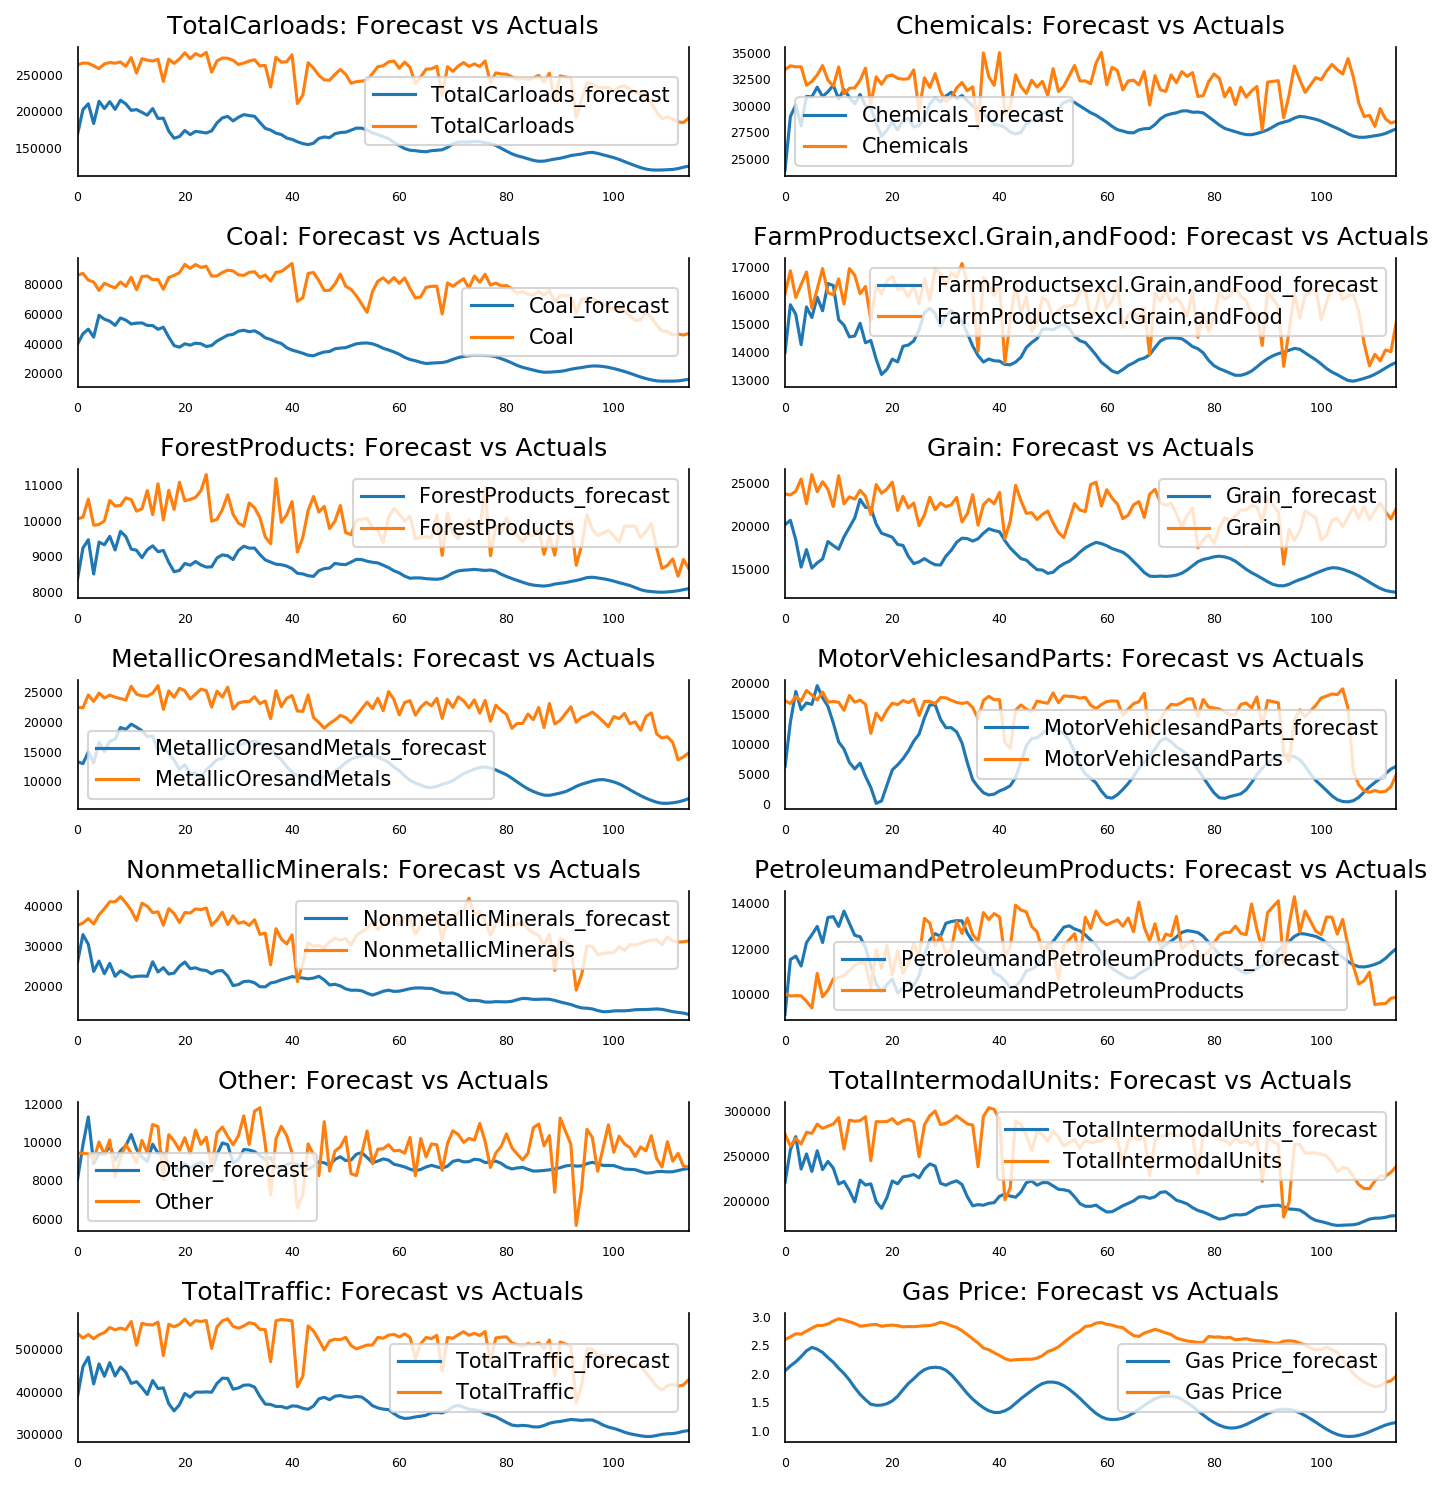

In [374]:
fig, axes = plt.subplots(nrows=int(len(train_weeks.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(train_weeks.columns, axes.flatten())):
    df_results[col+"_forecast"].plot(legend=True, ax=ax).autoscale(axis="x", tight=True) # df_results calls df_forecast which contains training period
    train_weeks[col][-nobs:].plot(legend=True, ax=ax);    # Testing period begins at 115 weeks in so no overlap with training forecasted values - can use train weeks as test data here to see overlaping in time 
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

In [375]:
df_results.drop(df_results.columns[:14], axis = 1, inplace = True)

In [376]:
df_results

TotalCarloads_forecast  Chemicals_forecast  Coal_forecast  \
0             168733.429218        23922.232729   39675.766345   
1             201953.487635        29002.464536   46600.394614   
2             209996.902972        30065.746543   49738.767798   
3             183010.534188        28114.204857   44361.145624   
4             213443.440126        30889.992252   59054.769080   
..                      ...                 ...            ...   
110           119726.401716        27174.661369   14725.435689   
111           120143.940299        27250.962104   14730.898895   
112           121309.116685        27390.207763   14888.013322   
113           123172.431211        27614.153170   15379.966547   
114           124734.722423        27825.162302   15985.403173   

     FarmProductsexcl.Grain,andFood_forecast  ForestProducts_forecast  \
0                               13976.854219              8368.494619   
1                               15667.059409              9231.793792   
2                               15324.543381              9461.647792   
3                               14249.464765              8501.912753   
4                               15589.460031              9395.385446   
..                                       ...                      ...   
110                             13199.720634              7997.922961   
111                             13304.771943              8012.181064   
112                             13421.195248              8032.688654   
113                             13534.695242              8061.557891   
114                             13620.068024              8092.801617   

     Grain_forecast  MetallicOresandMetals_forecast  \
0      20120.430441                    13288.419282   
1      20625.312478                    12970.042503   
2      18364.518406                    14926.394866   
3      15200.311416                    13122.223329   
4      17227.190231                    16561.664520   
..              ...                             ...   
110    13072.949367                     6325.097279   
111    12726.091780                     6408.714706   
112    12480.402177                     6555.325734   
113    12351.594733                     6795.576255   
114    12278.873895                     7129.567451   

     MotorVehiclesandParts_forecast  NonmetallicMinerals_forecast  \
0                       6198.707661                  26051.548493   
1                      13591.995991                  32894.854421   
2                      18665.256037                  30473.503027   
3                      15652.498397                  23705.024899   
4                      16768.075411                  26287.530521   
..                              ...                           ...   
110                     3562.612607                  13931.883540   
111                     4237.320762                  13632.958495   
112                     5025.947116                  13440.821604   
113                     5795.892149                  13264.788956   
114                     6244.460962                  12945.861431   

     PetroleumandPetroleumProducts_forecast  Other_forecast  \
0                               9073.061213     8058.464372   
1                              11511.262957     9859.357766   
2                              11660.224480    11317.017874   
3                              11221.432073     8882.395288   
4                              12264.638007     9404.821594   
..                                      ...             ...   
110                            11293.765323     8442.778888   
111                            11390.961098     8449.517905   
112                            11562.780994     8512.186637   
113                            11794.066665     8580.606559   
114                            11996.379166     8616.614082   

     TotalIntermodalUnits_forecast  TotalTraffic_forecast  Gas Price_forecast  
0       

In [377]:
mape = np.mean(np.abs((train_weeks.values - df_results.values) / train_weeks.values)*100)
print( "Training Performance:")
print("MAPE: ", mape)
print("Accuracy: ", 100-mape)

Training Performance:
MAPE:  29.577644572996856
Accuracy:  70.42235542700314


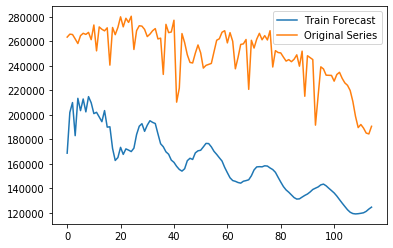

In [389]:
plt.plot(df_results["TotalCarloads_forecast"])
plt.plot(train_weeks.values[:,0])
plt.legend(["Train Forecast","Original Series"], loc ="upper right")
plt.show()

In [316]:
mape = np.mean(np.abs((test_weeks.values - df_results.values[-52:]) / test_weeks.values)*100)
print("Testing Performance:")
print("MAPE: ", mape)
print("Accuracy: ", 100-mape)

Testing Performance:
MAPE:  44.84422141700016
Accuracy:  55.15577858299984


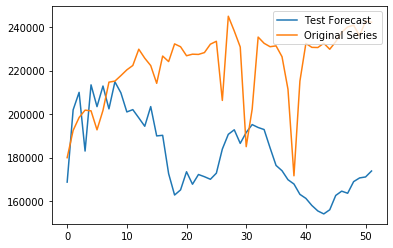

In [393]:
plt.plot(df_results["TotalCarloads_forecast"][:52,])
plt.plot(test_weeks.values[:,0])
plt.legend(["Test Forecast","Original Series"], loc ="upper right")
plt.show()

In [378]:
train_weeks.shape

(115, 14)

In [365]:
df_results.shape

(115, 14)

In [ ]:
test_weeks.shape

In [ ]:
'''

Test:
10: Mape: 95%
Accuracy: 5%

9: MAPE:   44.8
Accuracy:  55.1

8: MAPE:    16.7
Accuracy:   83

7: MAPE:   20.5
Accuracy:  79.5

6: MAPE:   21
Accuracy:  78

5: MAPE:   20.5
Accuracy:  79.5

4: MAPE:   18.9
Accuracy:  81

3: MAPE:   17.3
Accuracy:  82.7

2: MAPE:  20.5
Accuracy: 79.5

1: MAPE:  20.5
Accuracy: 79.5

In [ ]:
df_forecasts